# AIR BNB PARIS DATA CLEANING AND EDA

## PART 1: DATA CLEANING

### A- Loading the dataframe and getting info about it

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [222]:
listings = pd.read_csv('C:/Users/Merveille/Desktop/DSTP12/DSPT12_EDA/listings.csv', delimiter=',')
listings.head()

id                         listing_url       scrape_id last_scraped  \
0  52931  https://www.airbnb.com/rooms/52931  20230904181324   2023-09-06   
1  53353  https://www.airbnb.com/rooms/53353  20230904181324   2023-09-05   
2   3109   https://www.airbnb.com/rooms/3109  20230904181324   2023-09-05   
3  54377  https://www.airbnb.com/rooms/54377  20230904181324   2023-09-05   
4   5396   https://www.airbnb.com/rooms/5396  20230904181324   2023-09-05   

            source                                               name  \
0  previous scrape  Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...   
1      city scrape  Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...   
2      city scrape  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...   
3      city scrape  Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...   
4      city scrape  Rental unit in Paris · ★4.56 · Studio · 1 bed ...   

                                         description  \
0  I will be delighted to welcome you to my charm...   
1  A 100 m2 Loft/apartment (with 20 m2 terrace) o...   
2  Lovely Appartment with one bedroom with a Quee...   
3  We love Paris. Giving tourists the opportunity...   
4  NEW SOFA-BED SINCE JUNE 2023, Please disregard...   

                               neighborhood_overview  \
0  In some streets, Les Épinettes has also become...   
1  NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...   
2  Good restaurants<br />very close the Montparna...   
3  The district is cosmopolitan and particularly ...   
4  You are within walking distance to the Louvre,...   

                                         picture_url   host_id  ...  \
0  https://a0.muscache.com/pictures/miso/Hosting-...  50502817  ...   
1  https://a0.muscache.com/pictures/2a1726b5-5a09...  37051412  ...   
2  https://a0.muscache.com/pictures/baeae9e2-cd53...      3631  ...   
3  https://a0.muscache.com/pictures/miso/Hosting-...    247562  ...   
4  https://a0.muscache.com/pictures/52413/f9bf76f...      7903  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.71                   4.24                4.24   
1                        4.91                   4.48                4.73   
2                        5.00                   5.00                5.00   
3                        5.00                   4.57                4.88   
4                        4.83                   4.95                4.55   

         license instant_bookable calculated_host_listings_count  \
0  7511706944917                t                            382   
1  7511800114704                f                              1   
2  7511409139079                f                              1   
3  7511800523290                f                              1   
4  7510402838018                f                              1   

  calculated_host_listings_count_entire_homes  \
0                                         378   
1                                           1   
2                                           1   
3                                           0   
4                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            4   
1                                            0   
2                                            0   
3                                            1   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.65  
1                                           0              0.24  
2                                           0              0.11  
3                                           0              1.19  
4                                           0              2.05  

[5 rows x 75 columns]

In [223]:
listings.shape

(67942, 75)

In [224]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67942 entries, 0 to 67941
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67942 non-null  int64  
 1   listing_url                                   67942 non-null  object 
 2   scrape_id                                     67942 non-null  int64  
 3   last_scraped                                  67942 non-null  object 
 4   source                                        67942 non-null  object 
 5   name                                          67942 non-null  object 
 6   description                                   67416 non-null  object 
 7   neighborhood_overview                         38031 non-null  object 
 8   picture_url                                   67942 non-null  object 
 9   host_id                                       67942 non-null 

In [225]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

### B- Removing null, dummy, duplicates and NA values

In [226]:
listings.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               14757
Length: 75, dtype: int64

In [227]:
##Remove columns that have a lot of null values
def columns_check(listing):
    isnull=[]
    for column in listing.columns:
        if pd.isnull(listing[column]).sum()>=30000 or pd.isna(listing[column]).sum()>=30000:
            isnull.append(column)     
    return isnull

columns_to_drop=columns_check(listings)
columns_to_drop

['host_about',
 'host_neighbourhood',
 'neighbourhood_group_cleansed',
 'bathrooms',
 'calendar_updated']

In [228]:
listings.drop(columns=columns_to_drop,inplace=True)

In [229]:
listings.dropna(how='all')

id                                      listing_url  \
0                   52931               https://www.airbnb.com/rooms/52931   
1                   53353               https://www.airbnb.com/rooms/53353   
2                    3109                https://www.airbnb.com/rooms/3109   
3                   54377               https://www.airbnb.com/rooms/54377   
4                    5396                https://www.airbnb.com/rooms/5396   
...                   ...                                              ...   
67937  972886538090125888  https://www.airbnb.com/rooms/972886538090125888   
67938  972890854868668144  https://www.airbnb.com/rooms/972890854868668144   
67939  972894575720459810  https://www.airbnb.com/rooms/972894575720459810   
67940  972904630185591405  https://www.airbnb.com/rooms/972904630185591405   
67941  972916211667468705  https://www.airbnb.com/rooms/972916211667468705   

            scrape_id last_scraped           source  \
0      20230904181324   2023-09-06  previous scrape   
1      20230904181324   2023-09-05      city scrape   
2      20230904181324   2023-09-05      city scrape   
3      20230904181324   2023-09-05      city scrape   
4      20230904181324   2023-09-05      city scrape   
...               ...          ...              ...   
67937  20230904181324   2023-09-05      city scrape   
67938  20230904181324   2023-09-05      city scrape   
67939  20230904181324   2023-09-05      city scrape   
67940  20230904181324   2023-09-05      city scrape   
67941  20230904181324   2023-09-05      city scrape   

                                                    name  \
0      Rental unit in Paris · ★4.65 · 2 bedrooms · 2 ...   
1      Rental unit in Paris · ★4.82 · 2 bedrooms · 3 ...   
2      Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...   
3      Rental unit in Paris · ★4.94 · 1 bedroom · 1 b...   
4      Rental unit in Paris · ★4.56 · Studio · 1 bed ...   
...                                                  ...   
67937  Rental unit in Paris · ★New · 1 bedroom · 2 be...   
67938  Rental unit in Paris · ★New · 3 bedrooms · 5 b...   
67939  Rental unit in Paris · ★New · 3 bedrooms · 4 b...   
67940  Rental unit in Paris · ★New · 2 bedrooms · 4 b...   
67941  Rental unit in Paris · ★New · 1 bedroom · 3 be...   

                                             description  \
0      I will be delighted to welcome you to my charm...   
1      A 100 m2 Loft/apartment (with 20 m2 terrace) o...   
2      Lovely Appartment with one bedroom with a Quee...   
3      We love Paris. Giving tourists the opportunity...   
4      NEW SOFA-BED SINCE JUNE 2023, Please disregard...   
...                                                  ...   
67937  ClickYourTravel is delighted to present Suite ...   
67938  ClickYourTravel is delighted to present Suite ...   
67939  ClickYourTravel is pleased to present Suite Sa...   
67940  <b>The space</b><br />Ensuring the comfort of ...   
67941  <b>The space</b><br />Ensuring the comfort of ...   

                                   neighborhood_overview  \
0      In some streets, Les Épinettes has also become...   
1      NEIGHBORHOOD: Montmartre-Clichy-Pigalles-Les F...   
2      Good restaurants<br />very close the Montparna...   
3      The district is cosmopolitan and particularly ...   
4      You are within walking distance to the Louvre,...   
...                                                  ...   
67937  Located in the heart of Paris, in the 20th arr...   
67938  Located in the heart of Paris, our apartment i...   
67939  Located in the heart of Paris, our apartment i...   
67940                                                NaN   
67941                                                NaN   

                                             picture_url    host_id  ...  \
0      https://a0.muscache.com/pictures/miso/Hosting-...   50502817  ...   
1      https://a0.muscache.com/pictures/2a1726b5-5a09...   37051412  ...   
2      https://a0.muscache.com/pic

In [230]:
listings.drop_duplicates(keep = 'first', inplace = True, ignore_index = True)

Change datatype from Price and host since

In [231]:
listings['price'] = listings['price'].replace('[$,]', '', regex=True).astype(float) 
listings['host_since']=pd.to_datetime(listings['host_since'], format="%Y-%m-%d")
listings['host_since_year']=listings['host_since'].dt.year
listings['host_response_rate']= listings['host_response_rate'].replace('[%,]', '', regex=True).astype(float) 
listings['host_acceptance_rate']= listings['host_acceptance_rate'].replace('[%,]', '', regex=True).astype(float) 
listings['review_scores_location']=listings['review_scores_location'].fillna(0)

In [232]:
dummy_values=listings[listings['price']>=20000].index
listings.drop(dummy_values,inplace=True)

In [233]:
dummy_values1=listings[listings['bedrooms']>=20].index
listings.drop(dummy_values1,inplace=True)

In [234]:
listings.shape

(67928, 71)

## PART 2: EXPLORATORY DATA ANALYSIS

### A- Describe important columns of the dataframe

In [235]:
listings[['host_listings_count','price','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','reviews_per_month','host_response_rate','host_acceptance_rate','minimum_nights','maximum_nights','number_of_reviews']].describe()

host_listings_count         price  review_scores_cleanliness  \
count         67921.000000  67928.000000               52676.000000   
mean             23.905037    203.368596                   4.604283   
std              89.604637    391.726366                   0.502789   
min               1.000000      8.000000                   0.000000   
25%               1.000000     80.000000                   4.460000   
50%               1.000000    124.500000                   4.750000   
75%               3.000000    209.000000                   4.960000   
max            2636.000000  15000.000000                   5.000000   

       review_scores_checkin  review_scores_communication  \
count           52664.000000                 52674.000000   
mean                4.787374                     4.807132   
std                 0.399096                     0.388268   
min                 0.000000                     0.000000   
25%                 4.750000                     4.770000   
50%                 4.910000                     4.940000   
75%                 5.000000                     5.000000   
max                 5.000000                     5.000000   

       review_scores_location  reviews_per_month  host_response_rate  \
count            67928.000000       53174.000000        42032.000000   
mean                 3.717956           1.122363           92.557647   
std                  2.024179           1.443799           18.886991   
min                  0.000000           0.010000            0.000000   
25%                  4.000000           0.190000           97.000000   
50%                  4.820000           0.630000          100.000000   
75%                  5.000000           1.540000          100.000000   
max                  5.000000          61.550000          100.000000   

       host_acceptance_rate  minimum_nights  maximum_nights  number_of_reviews  
count          45662.000000    67928.000000    6.792800e+04       67928.000000  
mean              81.767421       63.880815    7.530677e+02          23.821002  
std               26.324083      131.912888    3.837068e+04          53.983659  
min                0.000000        1.000000    1.000000e+00           0.000000  
25%               73.000000        2.000000    6.000000e+01           1.000000  
50%               96.000000        3.000000    3.650000e+02           6.000000  
75%              100.000000       20.000000    1.125000e+03          23.000000  
max              100.000000     1000.000000    1.000000e+07        2580.000000

### B- Understand Correlation between columns

In [236]:
listings[['price','accommodates','bedrooms','host_listings_count','number_of_reviews']].corr()

price  accommodates  bedrooms  host_listings_count  \
price                1.000000      0.299030  0.287247             0.115575   
accommodates         0.299030      1.000000  0.723771             0.052345   
bedrooms             0.287247      0.723771  1.000000             0.056564   
host_listings_count  0.115575      0.052345  0.056564             1.000000   
number_of_reviews   -0.008568      0.035545  0.020131            -0.045812   

                     number_of_reviews  
price                        -0.008568  
accommodates                  0.035545  
bedrooms                      0.020131  
host_listings_count          -0.045812  
number_of_reviews             1.000000

### C- Heatmaps (Price & Review) with Markers of well known places in Paris 

In [237]:
folium_hmap = folium.Map(
   location=[listings['latitude'].median(),listings['longitude'].median()], 
   zoom_start=11, 
   tiles="OpenStreetMap"
)
folium_hmap.add_child(
    HeatMap(
        listings[['latitude','longitude','price']],
        min_opacity=0.1,
        radius = 6,
        blur = 5
    )
)
folium.Marker(
   location=[48.868496526,2.304498782],
   popup="CHAMPS-ÉLYSÉES",
).add_to(folium_hmap)
folium.Marker(
   location=[48.858370,	2.294481],
   popup="Eiffel Tower",
).add_to(folium_hmap)
folium.Marker(
   location=[48.886193,	2.343090],
   popup="Montmartre",
).add_to(folium_hmap)


In [238]:
#Get the latitude and longitude of the place with the highest price so that it can be added as a marker
listings['price'].max()
id_max=listings['price'].idxmax()
high_latitude=listings['latitude'].loc[id_max]
high_longitude=listings['longitude'].loc[id_max]
high_latitude
high_longitude

2.377928987641068

In [239]:
folium.Marker(
   location=[high_latitude,	high_longitude],
   popup="highest price",
).add_to(folium_hmap)
folium_hmap

In [240]:
folium_hmap1 = folium.Map(
   location=[listings['latitude'].median(),listings['longitude'].median()], 
   zoom_start=11, 
   tiles="OpenStreetMap"
)
folium_hmap1.add_child(
    HeatMap(
        listings[['latitude','longitude','review_scores_location']],
        min_opacity=0.1,
        radius = 6,
        blur = 5
    )
)
folium.Marker(
   location=[48.868496526,2.304498782],
   popup="CHAMPS-ÉLYSÉES",
).add_to(folium_hmap1)
folium.Marker(
   location=[48.858370,	2.294481],
   popup="Eiffel Tower",
).add_to(folium_hmap1)
folium.Marker(
   location=[48.886193,	2.343090],
   popup="Montmartre",
).add_to(folium_hmap1)
folium_hmap1

### D- Understand the price, availability distribution per accommodates

Text(0.5, 1.0, 'availability 365 per accommodates')

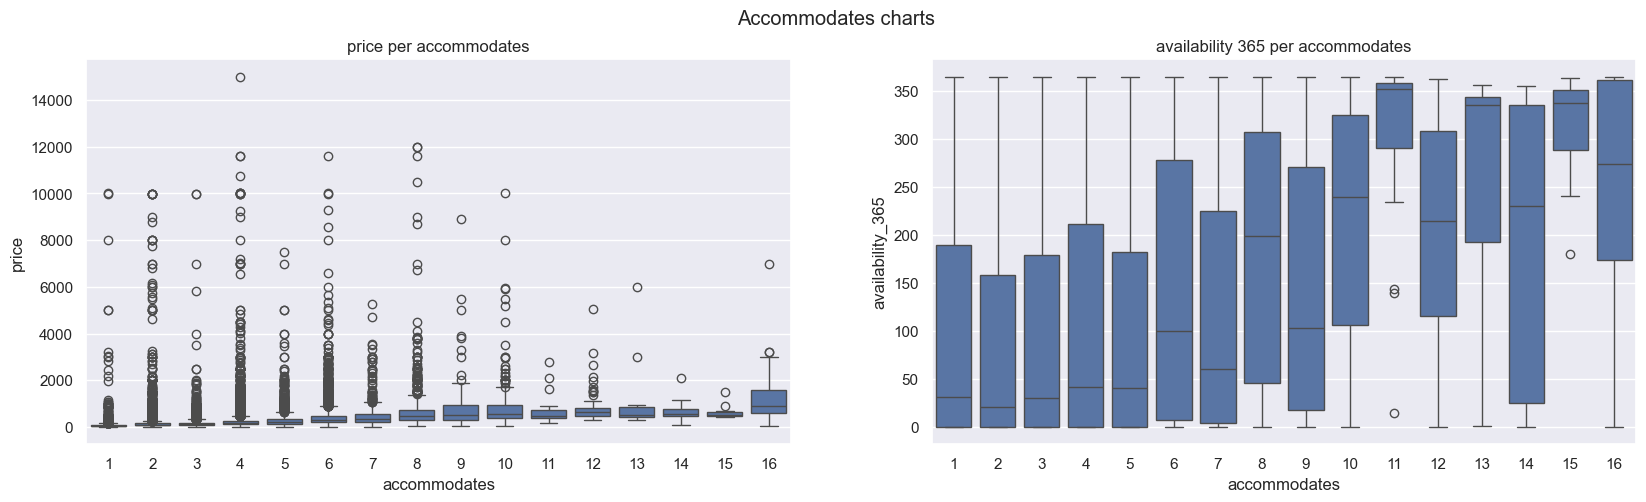

In [241]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
figure.suptitle('Accommodates charts')
sns.boxplot(data=listings, x="accommodates",y="price", ax=axes[0])
sns.boxplot(data=listings, x="accommodates",y="availability_365", ax=axes[1])
axes[0].set_title('price per accommodates')
axes[1].set_title('availability 365 per accommodates')

<Axes: xlabel='accommodates', ylabel='Count'>

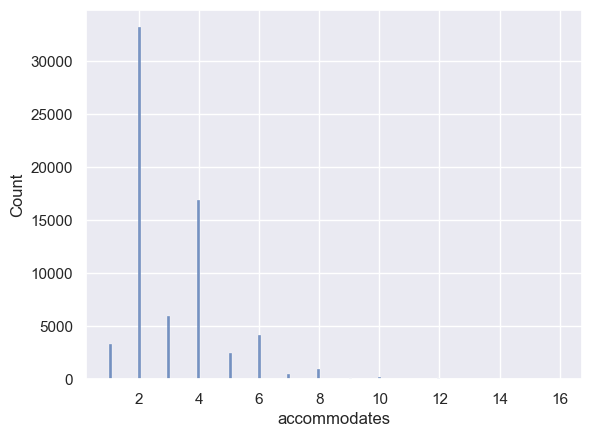

In [242]:
sns.histplot(data=listings, x="accommodates")

### E- Popular number of Bedrooms : 1 bedroom

<Axes: xlabel='bedrooms', ylabel='Count'>

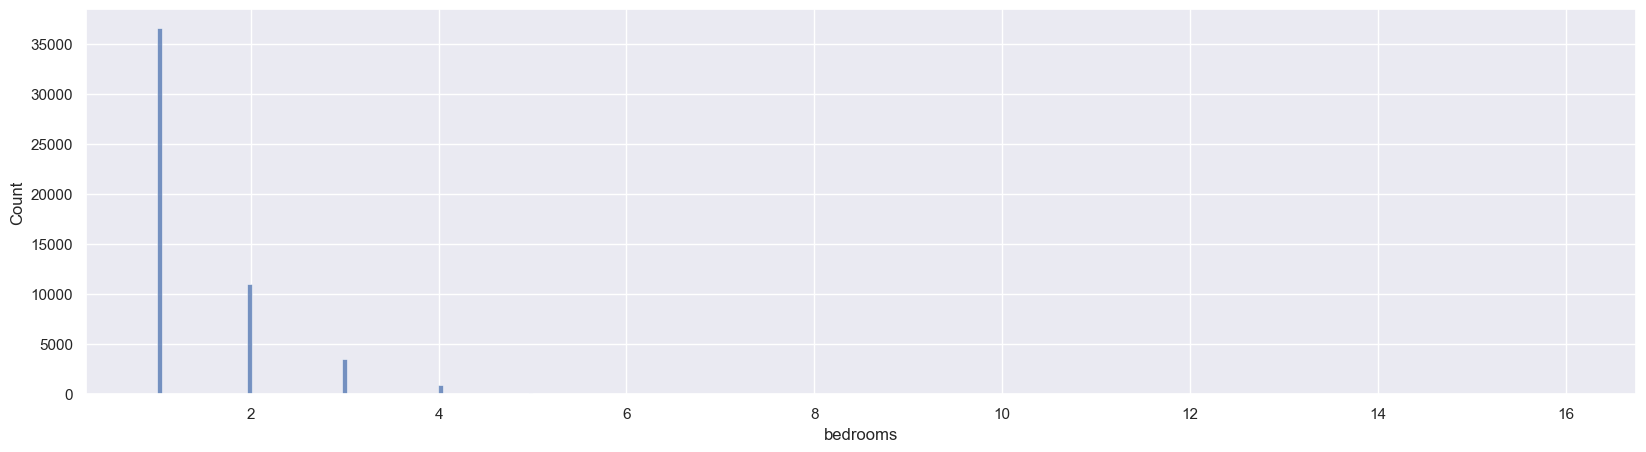

In [243]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="bedrooms")

### F- Popular room type per neighbourhood

<Axes: xlabel='neighbourhood_cleansed', ylabel='Count'>

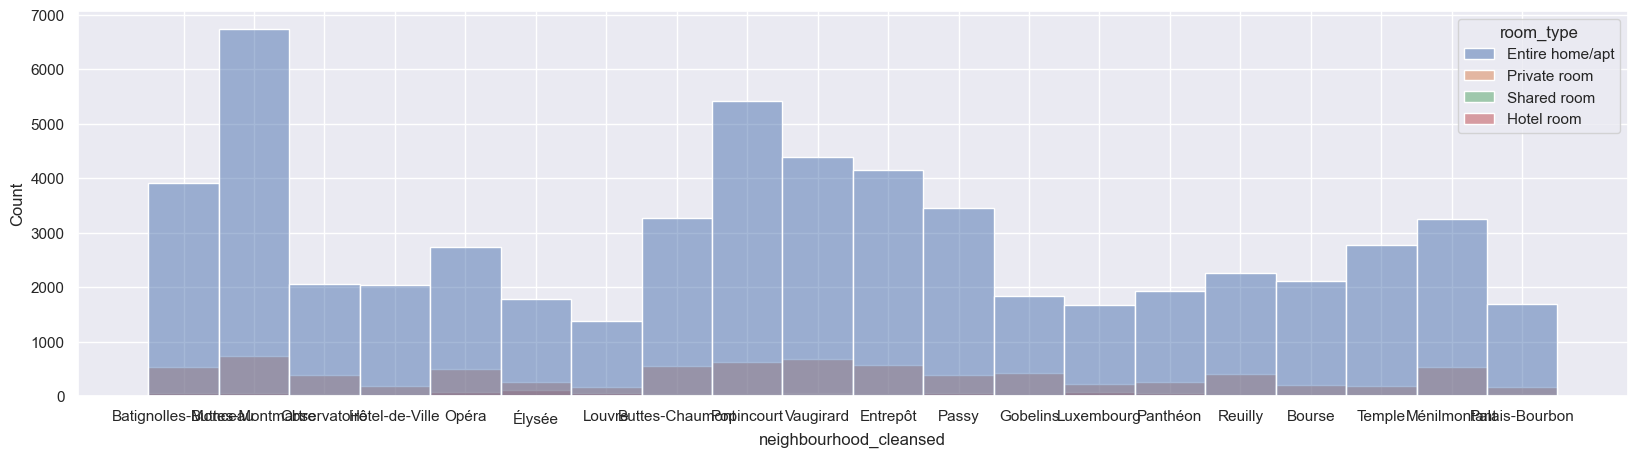

In [256]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="neighbourhood_cleansed",hue='room_type')

### G- Year where we got most people joining airbnb (2015) and status of host identity verified

<Axes: xlabel='host_since_year', ylabel='Count'>

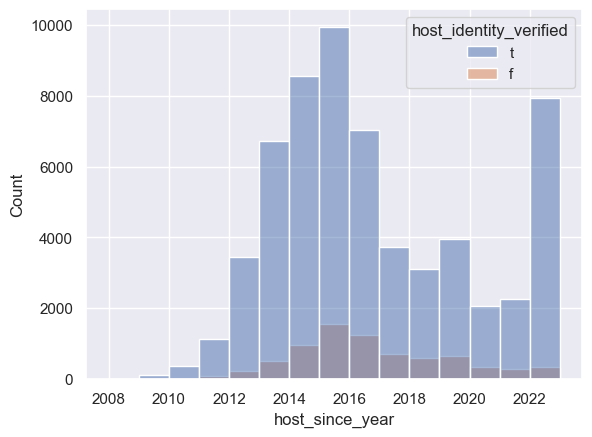

In [245]:
sns.histplot(data=listings, x='host_since_year', hue="host_identity_verified",binwidth = 1)

### H-Number of hosts with Instant bookable & Superhost status

<Axes: xlabel='host_is_superhost', ylabel='Count'>

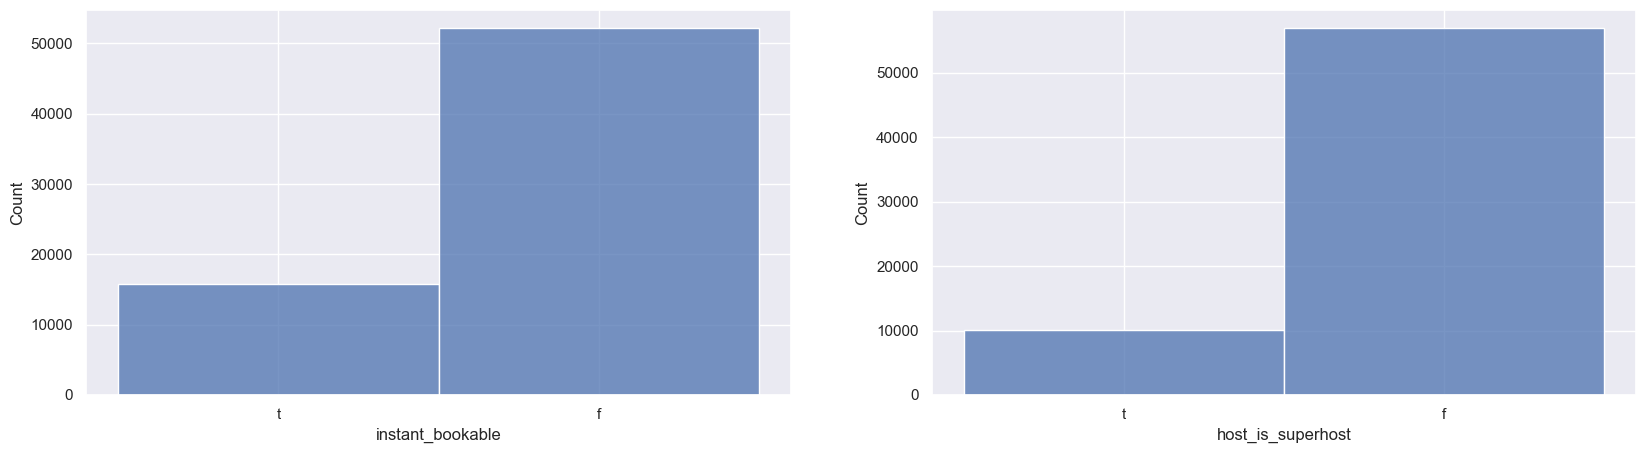

In [246]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
sns.histplot(data=listings, x="instant_bookable",binwidth = 1,ax=axes[0])
sns.histplot(data=listings, x="host_is_superhost", ax=axes[1])

### I-Responsiveness vs Superhost status

<Axes: xlabel='host_response_time', ylabel='Count'>

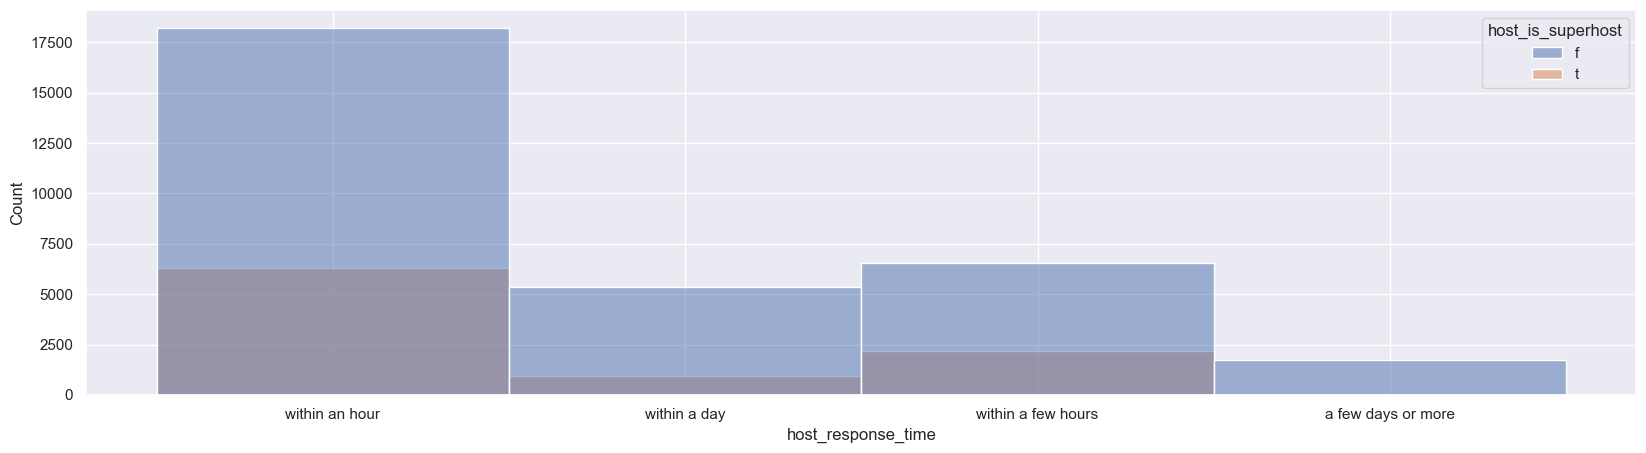

In [247]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="host_response_time", hue='host_is_superhost')

### J- Acceptance and response rate

<Axes: xlabel='host_acceptance_rate', ylabel='Count'>

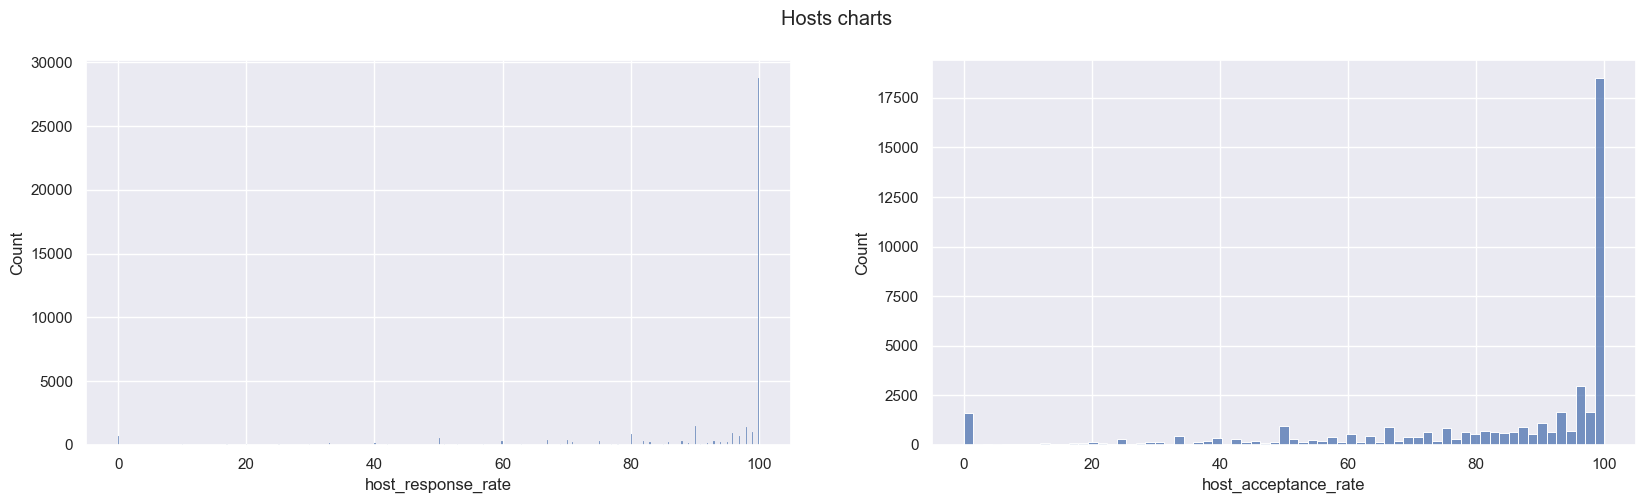

In [248]:
figure, axes = plt.subplots(1, 2, sharex=True,
                            figsize=(20, 5))
figure.suptitle('Hosts charts')
sns.histplot(data=listings, x="host_response_rate", ax=axes[0])
sns.histplot(data=listings, x="host_acceptance_rate", ax=axes[1] )


### J- Review score subplot

Text(0.5, 1.0, 'review_scores_value')

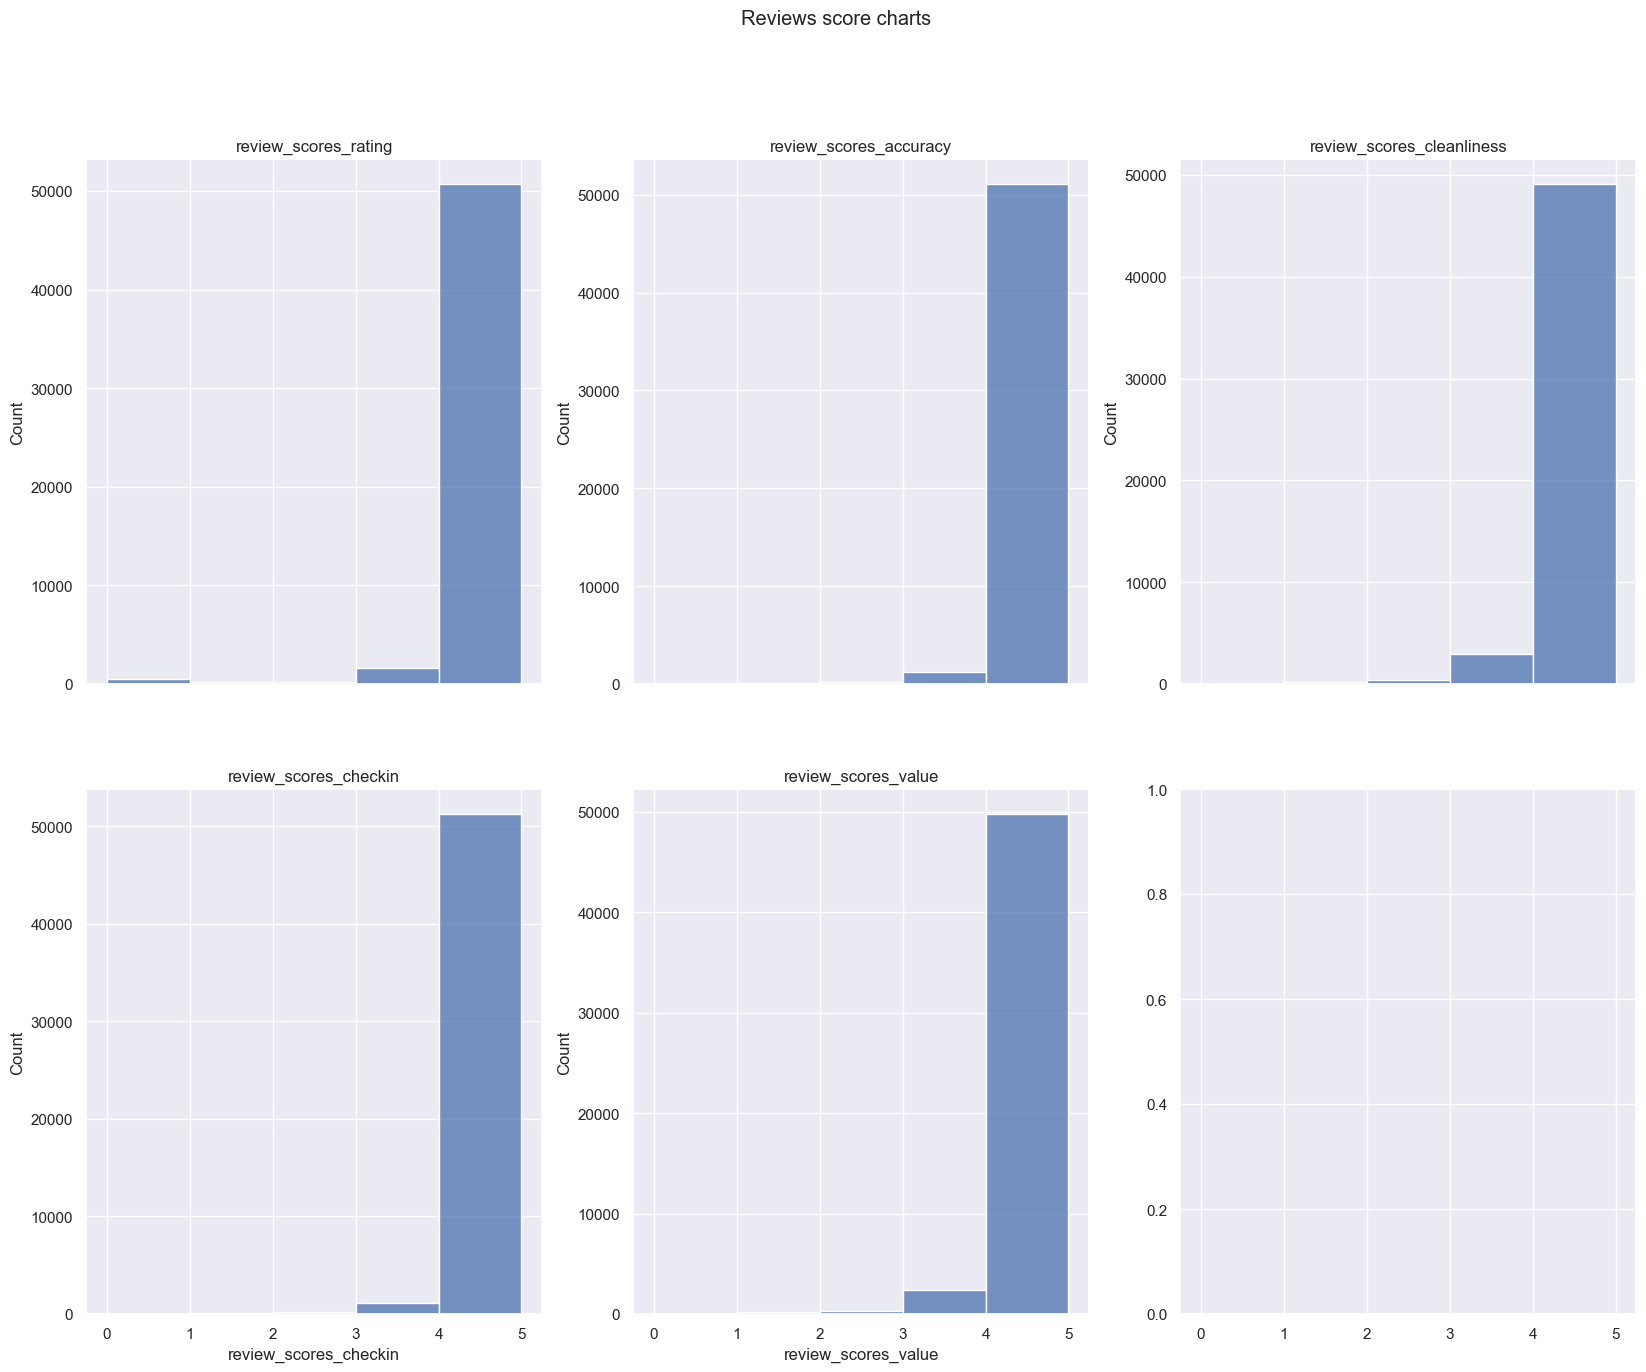

In [249]:
figure, axes = plt.subplots(2, 3, sharex=True,
                            figsize=(20, 15))
figure.suptitle('Reviews score charts')
sns.histplot(data=listings, x="review_scores_rating", binwidth = 1, ax=axes[0,0])
sns.histplot(data=listings, x="review_scores_accuracy",binwidth = 1, ax=axes[0,1])
sns.histplot(data=listings, x="review_scores_cleanliness",binwidth = 1, ax=axes[0,2])
sns.histplot(data=listings, x="review_scores_checkin",binwidth = 1, ax=axes[1,0])
sns.histplot(data=listings, x="review_scores_value",binwidth = 1, ax=axes[1,1])
axes[0,0].set_title('review_scores_rating')
axes[0,1].set_title('review_scores_accuracy')
axes[0,2].set_title('review_scores_cleanliness')
axes[1,0].set_title('review_scores_checkin')
axes[1,1].set_title('review_scores_value')


<Axes: xlabel='review_scores_communication', ylabel='Count'>

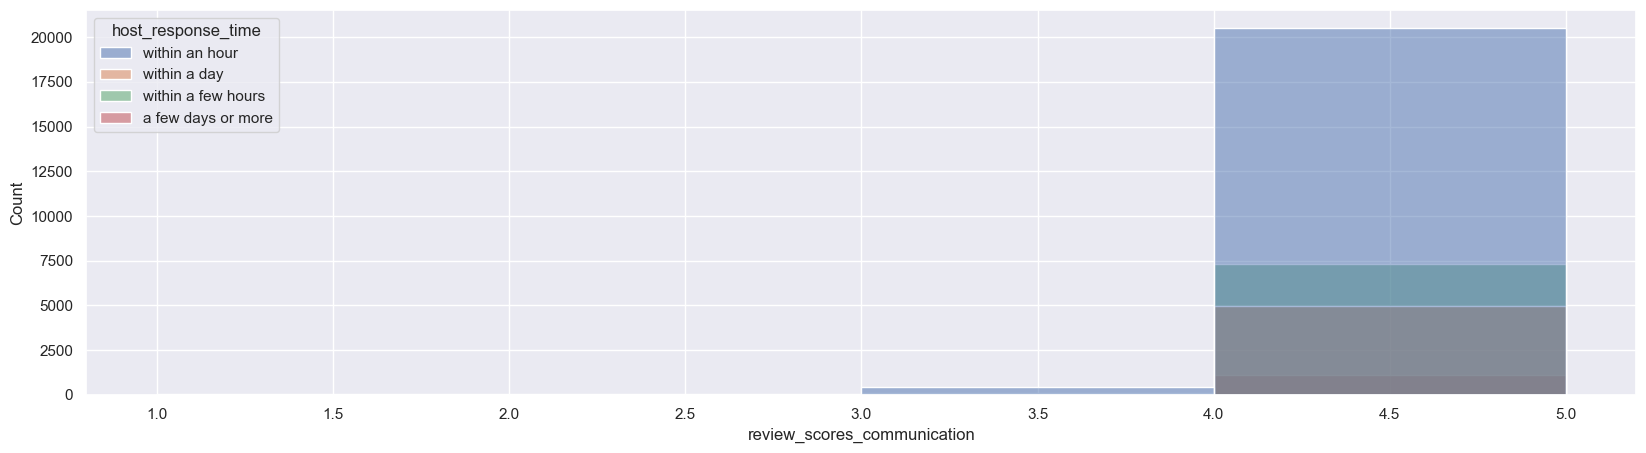

In [250]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="review_scores_communication", hue='host_response_time', binwidth = 1)


<Axes: xlabel='review_scores_location', ylabel='Count'>

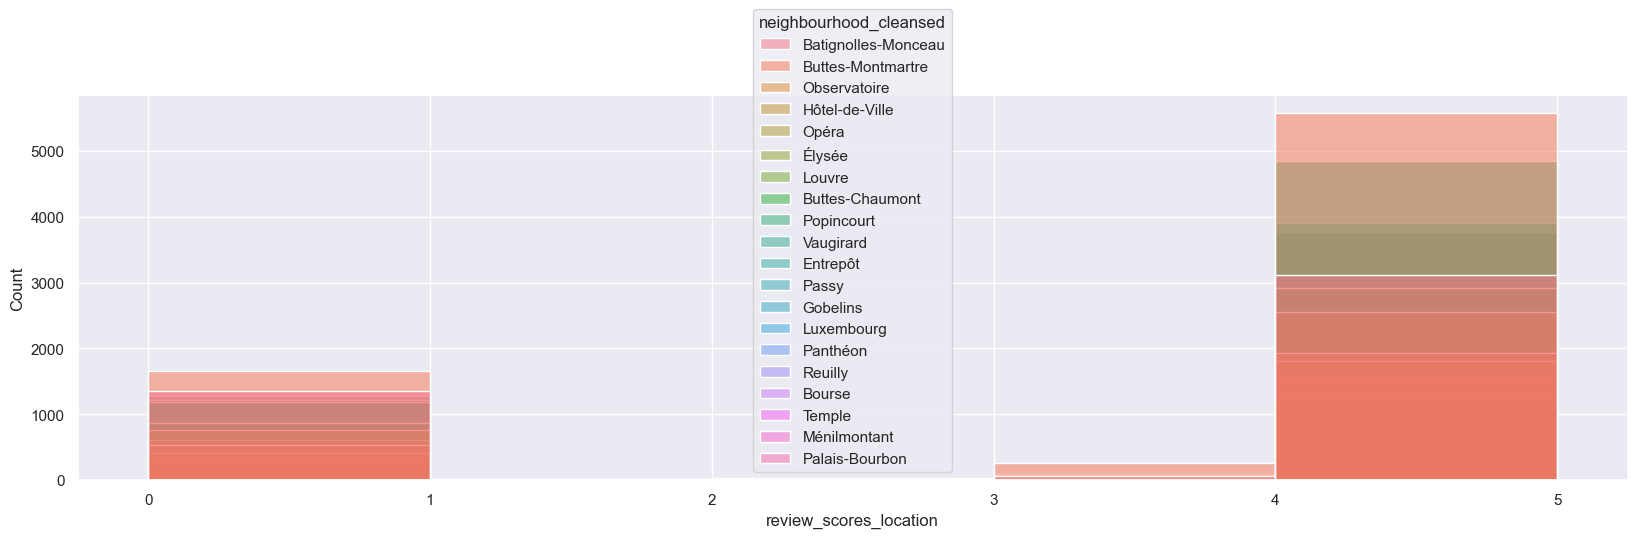

In [251]:
plt.figure(figsize=(20, 5))
sns.histplot(data=listings, x="review_scores_location",hue='neighbourhood_cleansed',binwidth = 1)